In [2]:
# Using the movie metadata set and the imdb data set come up with finidings (slice and dice the data to identify insights) 
#and also create charts whereever possible.
#Reading data sets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv("imdb.csv",escapechar="\\")
df1=pd.read_csv("movie_metadata.csv",escapechar="\\")
print(df.shape)
print(df1.shape)

(14761, 44)
(5043, 28)


# Observation:
1)The imdb data contains 14762 rows, 44 column variables.
2)The movie data contains 5043 observations, 28 column variables.


In [4]:
df.columns
imdb_df=df.drop(['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],axis=1)
imdb_df.head()
imdb_df.shape
#dropping duplicate rows
imdb_df=imdb_df.drop_duplicates()
imdb_df.shape

(14761, 16)

# Observation:
1)As genere column is already present in movies metadata  dataframe, removing all the genere list from imdb dataframe    dropping the duplicates from imdb dataset
2)There are no duplicates in imdb data

In [5]:
#dropping the duplicates from movies dataset
import re
li=[]
for i in df1['movie_imdb_link']:
    m = re.search('/([^/-]+)/\?',i).group(1)
    li.append(m)

df1["tid"]=li   
#dropping duration 
movies_df=df1.drop(['duration','title_year','movie_imdb_link','imdb_score'], axis = 1)

movies_df=movies_df.drop_duplicates()
movies_df.shape

(4998, 25)

# Observation:
1)Duration,title_year,movie_imdb_link,imdb_score columns are already existed in imdb dataset so removing them from movie dataset before merging the both dataframes.
2)There are duplicate observations in the movies dataset.


In [6]:
result_df = pd.merge(imdb_df,
                 movies_df,
                 on='tid')
result_df.shape

(3013, 40)

# Observation:
1)Merging the two data frames on title id.
2)After combining the two data sets, observed that data has less observations than original data. Combining data sets, in this case, doesn't make any sense.
3)If we perform outer/left/right joins, there are many null fields in the result dataset.


In [7]:
#finding missing values for each variable
print(result_df.isnull().sum())

fn                             0
tid                            0
title                          0
wordsInTitle                   5
url                            0
imdbRating                    16
ratingCount                   16
duration                      16
year                           3
type                           0
nrOfWins                       0
nrOfNominations                0
nrOfPhotos                     0
nrOfNewsArticles               0
nrOfUserReviews                0
nrOfGenre                      0
color                          3
director_name                 53
num_critic_for_reviews         0
director_facebook_likes       53
actor_3_facebook_likes         8
actor_2_name                   3
actor_1_facebook_likes         0
gross                        297
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   8
facenumber

In [8]:
#correlation matrix
print(result_df.corr())

                           imdbRating  ratingCount  duration      year  \
imdbRating                   1.000000     0.426505  0.293285 -0.209957   
ratingCount                  0.426505     1.000000  0.298159  0.081673   
duration                     0.293285     0.298159  1.000000 -0.129166   
year                        -0.209957     0.081673 -0.129166  1.000000   
nrOfWins                     0.417643     0.454457  0.231173  0.039443   
nrOfNominations              0.377736     0.470340  0.200230  0.126393   
nrOfPhotos                   0.132095     0.400933  0.108760  0.106449   
nrOfNewsArticles             0.188671     0.546801  0.130130  0.194341   
nrOfUserReviews              0.261236     0.770709  0.301910  0.079863   
nrOfGenre                   -0.045350     0.037948  0.110207  0.049992   
num_critic_for_reviews       0.251750     0.564530  0.184400  0.410752   
director_facebook_likes      0.180408     0.272568  0.168791 -0.053661   
actor_3_facebook_likes       0.032251 

In [9]:
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#print(__version__)
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
df1=result_df.corr()
df1.iplot(kind='heatmap',colorscale='YlOrRd')

# Observation:
1)visualization of the correlation matrix
2)observed that num_voted_users,rating count has 0.988 correlation and num_user_for_reviews, nrofuserreviews has 0.99 correlation. The total Facebook likes variable is highly correlating with actor1 Facebook likes.

In [11]:
g=result_df.groupby(['color','type','actor_1_name','actor_2_name'])['imdbRating'].mean()
g.groupby(level='color').nlargest(3).reset_index(level=0, drop=True)

color             type         actor_1_name     actor_2_name   
 Black and White  video.movie  Jack Warden      Lee J. Cobb        8.9
                               Liam Neeson      Embeth Davidtz     8.9
                               Takashi Shimura  Minoru Chiaki      8.8
Color             video.movie  Morgan Freeman   Jeffrey DeMunn     9.3
                               Al Pacino        Marlon Brando      9.2
                  video.tv     Krystyna Janda   Olaf Lubaszenko    9.2
Name: imdbRating, dtype: float64

# Observation:
1)color black and white and the movie type is video.movie of actor Jack and Lee, Liam and Embeth has the highest IMDB rating i.e 8.9
2)color is color and movie type is video.movie of actors Morgan and Jeffrey has the highest IMDb rating i.e 9.3


In [12]:
#finding percentage of wins for each color and type
g1=result_df.groupby(['color','type']).agg({'nrOfWins':'sum','nrOfNominations':'sum'})
g1['%wins']=((g1['nrOfWins'] / g1['nrOfNominations']) *100).round(3)
print(g1)

                              nrOfWins  nrOfNominations   %wins
color            type                                          
 Black and White video.movie      1712             1888  90.678
                 video.tv           14               35  40.000
Color            video.movie     19019            26915  70.663
                 video.tv          485             1345  36.059


# Observation:
1)Video movie has the highest number of wins than video.tv type.

In [12]:
#finding famous director based on imdb rating
g2=result_df.groupby(['color','type','director_name'])['imdbRating'].mean()
g2.groupby(level='color').nlargest(3).reset_index(level=0, drop=True)

color             type         director_name          
 Black and White  video.movie  Sidney Lumet               8.9
                               Steven Spielberg           8.9
                               Akira Kurosawa             8.8
Color             video.movie  Frank Capra                8.7
                               Milos Forman               8.6
                               Rakeysh Omprakash Mehra    8.6
Name: imdbRating, dtype: float64

In [16]:
#finding famous director based on wins
g3=result_df.groupby(['color','type','director_name'])['nrOfWins'].sum()
g3.groupby(level='color').nlargest(3).reset_index(level=0, drop=True)


color             type         director_name      
 Black and White  video.movie  Michel Hazanavicius    137
                               Martin Scorsese         81
                               Baz Luhrmann            75
Color             video.movie  Peter Jackson          398
                               Steven Spielberg       367
                               Ang Lee                295
Name: nrOfWins, dtype: int64

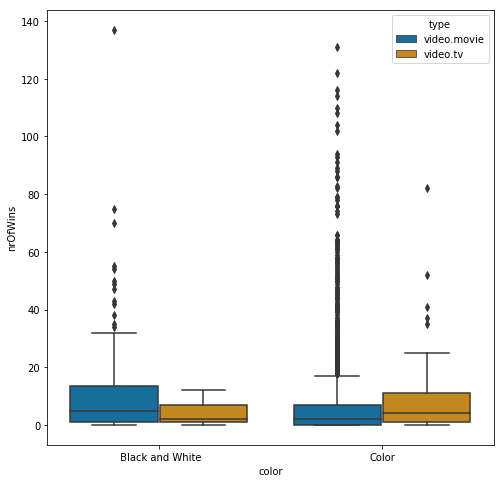

In [17]:
result_df.columns
plt.figure(figsize=(8,8))
sns.boxplot(x='color', y='nrOfWins', 
                 data=result_df, 
                 palette="colorblind",
                 hue='type')


# Observation:
1)when it comes to Video.movie type, the black and white has more  wins than color
2)when it comes to video tv type, the color has the highest wins than black and white.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



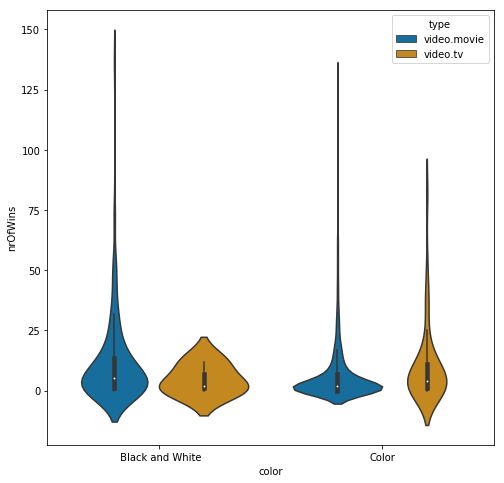

In [13]:
plt.figure(figsize=(8,8))
sns.violinplot(x='color', y='nrOfWins', 
                 data=result_df, 
                 palette="colorblind",
                 hue='type')

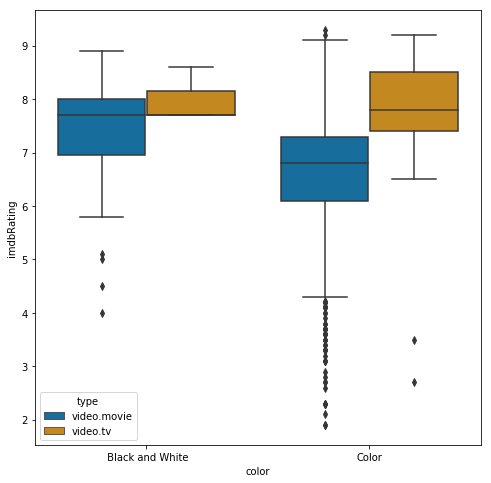

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(x='color', y='imdbRating', 
                 data=result_df, 
                 palette="colorblind",
                 hue='type');

# Observation:
1)When it comes to video movies, black and white movies having the highest rating.
2)when it comes to video tv category, the color tv movies having the highest rating.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



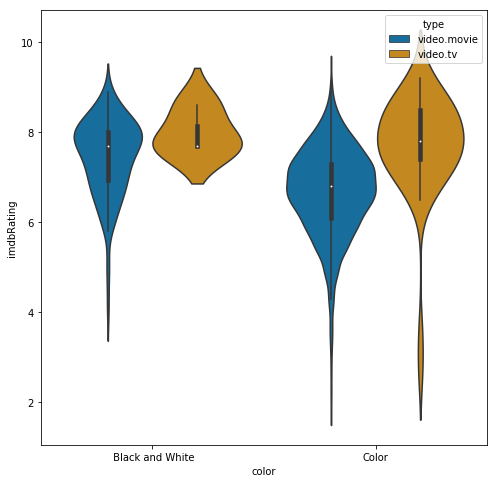

In [20]:
plt.figure(figsize=(8,8))
sns.violinplot(x='color', y='imdbRating', 
                 data=result_df, 
                 palette="colorblind",
                 hue='type')

#sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



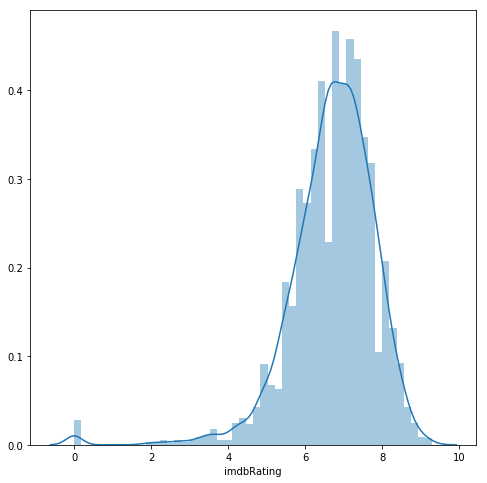

In [14]:
plt.figure(figsize=(8,8))
result_df["imdbRating"].fillna(0, inplace = True) 
sns.distplot(result_df['imdbRating'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



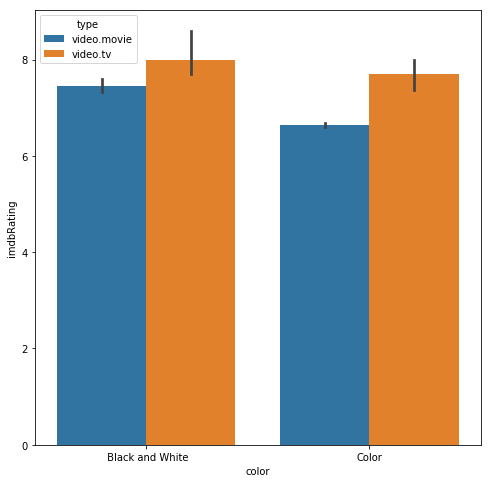

In [22]:
plt.figure(figsize=(8,8))
sns.barplot(x='color',y='imdbRating',data=result_df,hue='type',estimator=np.mean)
